In [2]:
from collections import Counter
from itertools import chain
import os

import matplotlib.pyplot as plt

In [3]:
import matplotlib.lines as mlines
import matplotlib.mlab as mlab
import numpy as np

In [4]:
babylm_data_path =  "/data/corpora/babylm/babylm_data/babylm_100M/"

In [5]:
babylm_data = {}

for file_path in os.listdir(babylm_data_path):
    if file_path.endswith(".train") and not "full" in file_path:
        subcorpus = file_path.split(".")[0]
        with open(os.path.join(babylm_data_path, file_path), "r") as f:
            content = f.read().split("\n")
            babylm_data[subcorpus] = [c.split() for c in content]

In [6]:
color_scheme = {
    "open_subtitles": "limegreen",
    "qed": "fuchsia",
    "bnc_spoken": "sandybrown",
    "wikipedia": "royalblue",
    "gutenberg": "gold",
    "aochildes": "lightcoral",
    "simple_wikipedia": "cornflowerblue",
    "children_stories": "tomato",
    "cbt": "slategrey",
    "switchboard": "dimgrey"
}

subcorpus_names = {
   "open_subtitles": "Open Subtitles",
   "qed": "QED",
   "bnc_spoken": "BNC Spoken",
   "wikipedia": "Wikipedia",
   "gutenberg": "Gutenberg",
   "aochildes": "CHILDES",
   "simple_wikipedia": "Simple Wikipedia",
   "children_stories": "Children's Stories",
   "cbt": "Children's Book Test",
   "switchboard": "Switchboard"
}

## Number of Sequences

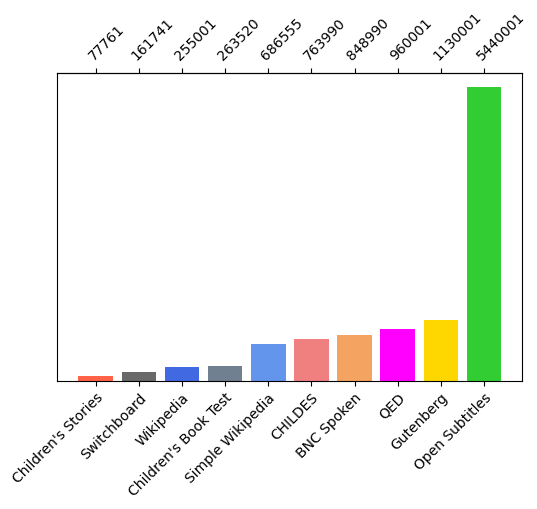

In [7]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

xs = range(0,10)

subcorpus_sizes = {s: len(c) for s, c in babylm_data.items()}
subcorpus_sizes = dict(sorted(subcorpus_sizes.items(), key=lambda item: item[1]))

for x, (s, y) in zip(xs, subcorpus_sizes.items()):
    plt.bar(x, y, color=color_scheme[s])


ax.set_xticks(xs, labels=[subcorpus_names[s] for s in subcorpus_sizes.keys()], ha="right", rotation_mode="anchor", rotation=45)
ax2 = ax.secondary_xaxis("top")
ax2.set_xticks(xs, labels=subcorpus_sizes.values(), ha="left", rotation_mode="anchor", rotation=45)

plt.yticks([])

plt.show()

## Sequence Length Distribution

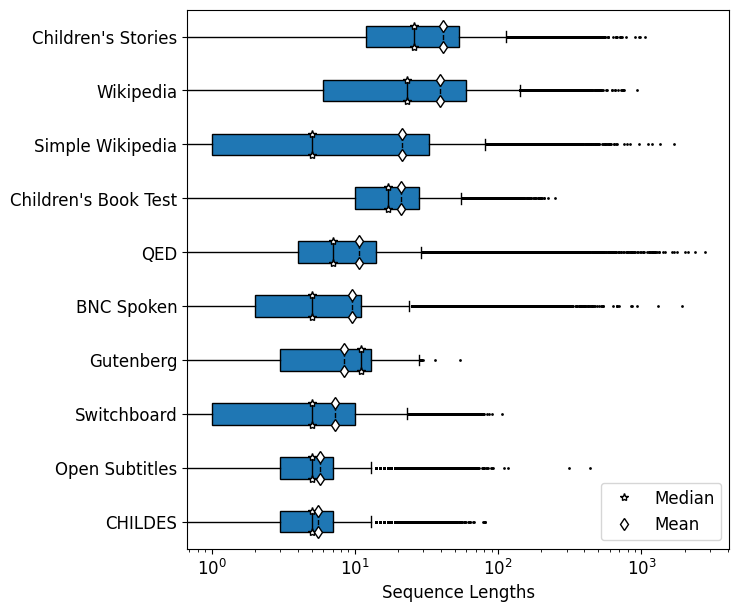

In [8]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

xs = range(0,10)

# modify appearance of boxplot
flierprops = dict(marker='o', markersize=1, markeredgecolor='black')
meanlineprops = dict(color='black', markersize=6, marker="d", markerfacecolor="white", markeredgecolor="black")
medianlineprops = dict(color='black', markersize=6, marker="*", markerfacecolor="white")

subcorpus_mean_seq_lengths = {s: np.mean([len(c) for c in cs]) for s, cs in babylm_data.items()}
subcorpus_mean_seq_lengths = dict(sorted(subcorpus_mean_seq_lengths.items(), key=lambda item: item[1]))

bplots = {}

for x, s in zip(xs, subcorpus_mean_seq_lengths.keys()):
    content = babylm_data[s]
    content_lengths = np.array([len(c) for c in content])
    bplot = plt.boxplot(content_lengths, vert=False, positions=[x], widths=[0.4], showmeans=True, meanline=True, 
                        medianprops=medianlineprops, meanprops=meanlineprops, flierprops=flierprops,
                        patch_artist=True)
    # bplot["boxes"][0].set_facecolor(color_scheme[s])

plt.xscale("log")
plt.xlabel("Sequence Lengths", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(xs, labels=[subcorpus_names[s] for s in subcorpus_mean_seq_lengths.keys()], fontsize=12)

median_marker = mlines.Line2D([], [], marker="*", linestyle="None", markersize=6, label="Median", markeredgecolor="black", markerfacecolor="white")
mean_marker = mlines.Line2D([], [], marker="d", linestyle="None", markersize=6, label="Mean", markeredgecolor="black", markerfacecolor="white")

plt.legend(handles=[median_marker, mean_marker], fontsize=12)

plt.savefig("../out/img/sequence_lengths.png", bbox_inches="tight")

/tmp/ipykernel_3294140/4168070141.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


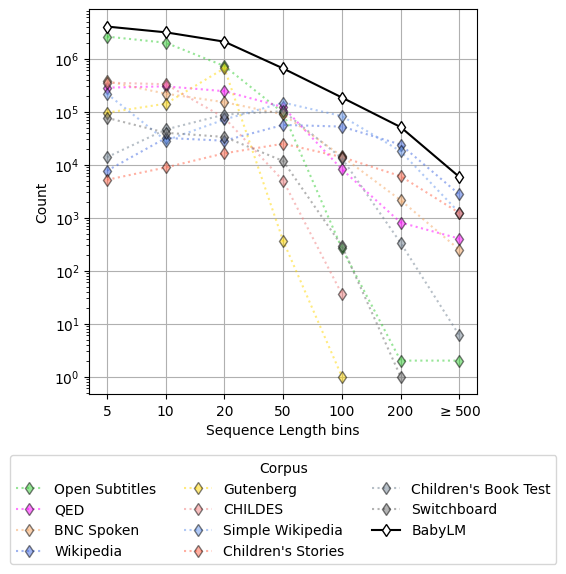

In [9]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

bins = [1, 5,10,20,50,100,200,500]
max_bin = np.max(bins)

content_lengths_all = []

# Subcorpora
for s, content in babylm_data.items():
    content_lengths = [len(c) if len(c) <= max_bin+1 else max_bin for c in content ]
    content_lengths_all.extend(content_lengths)
    hist, _ = np.histogram(content_lengths, bins)
    ax.plot([h for h in hist if h > 0], linestyle=":", color=color_scheme[s], label=subcorpus_names[s], marker="d", 
            markerfacecolor=color_scheme[s], markeredgecolor="black", alpha=0.5)

# Whole corpus 
hist, _ = np.histogram(content_lengths_all, bins)
ax.plot(hist, linestyle="-", color="black", label="BabyLM", marker="d", markerfacecolor="white", markeredgecolor="black")

xticklabels = [str(bin) for bin in bins[:-1]] + [r"$\geq 500$"]
ax.set_xticklabels(xticklabels)
plt.legend(bbox_to_anchor=(0.5, -.3), fontsize=10, loc="center", title="Corpus", ncol=3, fancybox=True, shadow=False)
plt.yscale("log")
plt.grid("y")
# plt.grid(axis="both", linestyle=":")
plt.ylabel("Count")
plt.xlabel("Sequence Length bins")
plt.show()

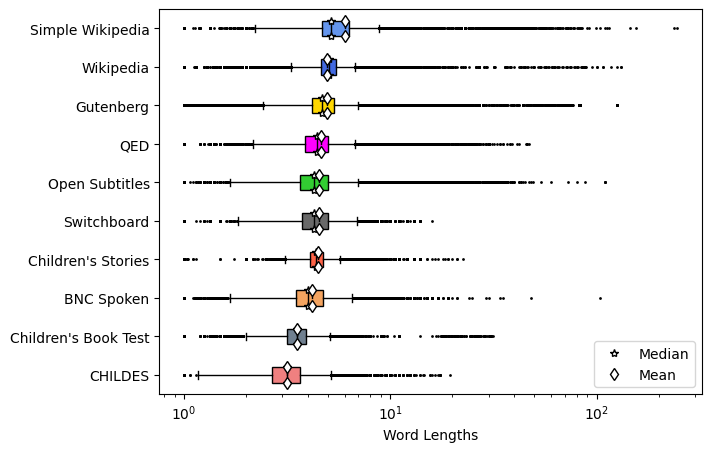

In [10]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

xs = range(0,10)

# modify appearance of boxplot
flierprops = dict(marker='o', markersize=1, markeredgecolor='black')
meanlineprops = dict(color='black', markersize=6, marker="d", markerfacecolor="white", markeredgecolor="black")
medianlineprops = dict(color='black', markersize=6, marker="*", markerfacecolor="white")

subcorpus_mean_word_lengths = {s: np.mean([sum([len(w) for w in c])/len(c) for c in cs if len(c)]) for s, cs in babylm_data.items()}
subcorpus_mean_word_lengths = dict(sorted(subcorpus_mean_word_lengths.items(), key=lambda item: item[1]))

bplots = {}

for x, s in zip(xs, subcorpus_mean_word_lengths.keys()):
    content = babylm_data[s]
    content_lengths = [sum([len(w) for w in c])/len(c) for c in content if len(c)]
    bplot = plt.boxplot(content_lengths, vert=False, positions=[x], widths=[0.4], showmeans=True, meanline=True, 
                        medianprops=medianlineprops, meanprops=meanlineprops, flierprops=flierprops,
                        patch_artist=True)
    bplot["boxes"][0].set_facecolor(color_scheme[s])

plt.xscale("log")
plt.xlabel("Word Lengths")
plt.yticks(xs, labels=[subcorpus_names[s] for s in subcorpus_mean_word_lengths.keys()])

median_marker = mlines.Line2D([], [], marker="*", linestyle="None", markersize=6, label="Median", markeredgecolor="black", markerfacecolor="white")
mean_marker = mlines.Line2D([], [], marker="d", linestyle="None", markersize=6, label="Mean", markeredgecolor="black", markerfacecolor="white")

plt.legend(handles=[median_marker, mean_marker])

plt.show()

## Type & Token Counts

In [11]:
ntypes, ntokens, token_counts = {}, {}, {}
for x, (s, content) in enumerate(babylm_data.items()):
    ntokens[s] = sum([len(c) for c in content])
    token_counts[s] = Counter(list(chain.from_iterable(content)))
    token_counts[s] = dict(sorted(token_counts[s].items(), key=lambda item: item[1], reverse=True))
    ntypes[s] = len(token_counts[s].keys())

ntokens = dict(sorted(ntokens.items(), key= lambda item: item[1]))

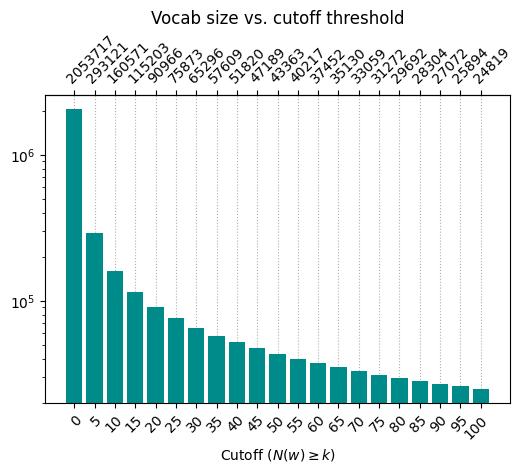

In [12]:
# total word-level vocabulary size
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

K = 100

vocab_sizes = []

for i, k in enumerate(np.arange(0,K+1,5)):
    vocab_at_k = set(chain.from_iterable([[key for key in token_counts[s] if token_counts[s][key] >= k] for s in token_counts]))
    vocab_size_at_k = len(vocab_at_k)
    vocab_sizes.append(vocab_size_at_k)
    plt.bar(i, vocab_size_at_k, color="darkcyan")

xs = range(len(vocab_sizes))
ax.set_xticks(xs, labels=np.arange(0,K+1,5), ha="right", rotation_mode="anchor", rotation=45)
ax2 = ax.secondary_xaxis("top")
ax2.set_xticks(xs, labels=vocab_sizes, ha="left", rotation_mode="anchor", rotation=45)

plt.grid(axis="x", linestyle=":")
ax.set_axisbelow(True)
plt.yticks([])
plt.yscale("log")
plt.xlabel("Cutoff (" + r"$N(w) \geq k$"+ ")")

plt.title("Vocab size vs. cutoff threshold")

plt.show()

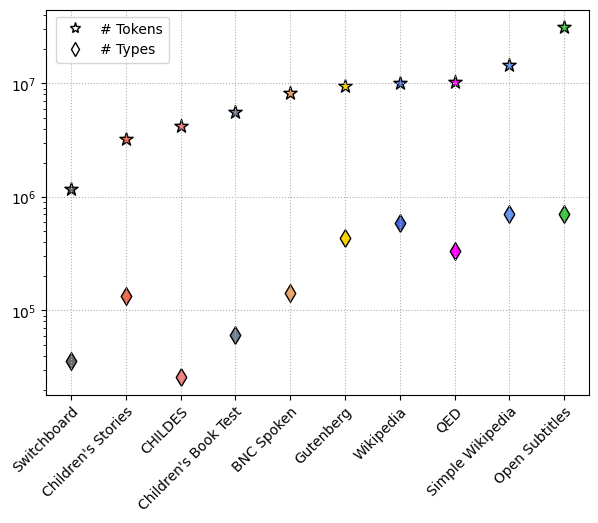

In [13]:
# number of tokens vs number of types

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

# ax2 = ax.twinx()

for x, s in enumerate(ntokens):
    ax.scatter(x+1, ntokens[s], color=color_scheme[s], marker="*", s=100, edgecolors="black")
    ax.scatter(x+1, ntypes[s], color=color_scheme[s], marker="d", s=80, edgecolors="black")

ax.set_yscale("log")
# ax2.set_yscale("log")

median_marker = mlines.Line2D([], [], marker="*", linestyle="None", markersize=8, label="# Tokens", markeredgecolor="black", markerfacecolor="white")
mean_marker = mlines.Line2D([], [], marker="d", linestyle="None", markersize=7, label="# Types", markeredgecolor="black", markerfacecolor="white")

ax.set_xticks(range(1,len(ntokens)+1))
ax.set_xticklabels([subcorpus_names[s] for s in ntokens], ha="right", rotation_mode="anchor", rotation=45)
ax.grid(linestyle=":")
# ax2.grid(linestyle="--")

plt.legend(handles=[median_marker, mean_marker], bbox_to_anchor=(0.005, 1.0), fontsize=10, loc="upper left", ncol=1, fancybox=True, shadow=False)
plt.show()

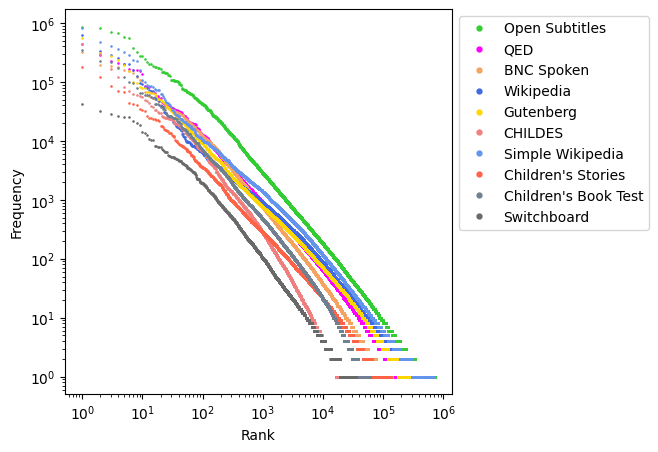

In [14]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

handles = []

for s, counts in token_counts.items():
    x = range(1,len(counts)+1)
    ax.scatter(x, counts.values(), marker=".", s=3, color=color_scheme[s], label=subcorpus_names[s])
    handle = mlines.Line2D([], [], marker=".", linestyle="None", markersize=7, label=subcorpus_names[s], color=color_scheme[s])
    handles.append(handle)

ax.set_yscale("log")
ax.set_ylabel("Frequency")
ax.set_xscale("log")
ax.set_xlabel("Rank")
plt.legend(handles=handles, bbox_to_anchor=(1.0, 1.0), fontsize=10, loc="upper left", ncol=1, fancybox=True, shadow=False)

plt.show()